## **Code playground for SDA Week_11**


# Graph


## Graph representation


Lets consider the following graph(V, E):


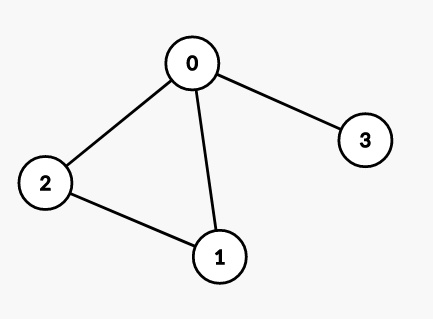


### Adjacency matrix


Requires _V<sup>2</sup>_ memory. Used for dense graphs. Represented as boolean matrix where each cell is _1 (True)_ if there is an edge between vertexes _i_ and _j_ and _0 (False)_ otherwise.


In [1]:
graph_matrix = [[0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0], [1, 0, 0, 0]]

## Adjacency list


Requires _V + E_ memory. Used for sparse graphs. Represented as dictionary where each vertex is a key, with value - a set of neighboring vertexes. The set allows for _O(1)_ check if there is an edge between two vertexes.


In [2]:
graph_list = {0: set([1, 2, 3]), 1: set([0, 2]), 2: set([0, 1]), 3: set([0])}

## Breadth-first search


The algorithm traverses the graph starting from a given vertex. It first finds the vertexes that are neighbors with the starting one (_distance = 1_), then vertexes that are at _distance = 2_, etc.


In [3]:
graph_bfs = {0: set([1, 2, 3]), 1: set([0, 2, 4]), 2: set([0, 1]), 3: set([0, 5]), 4: set([1, 5]), 5: set([3, 4])}

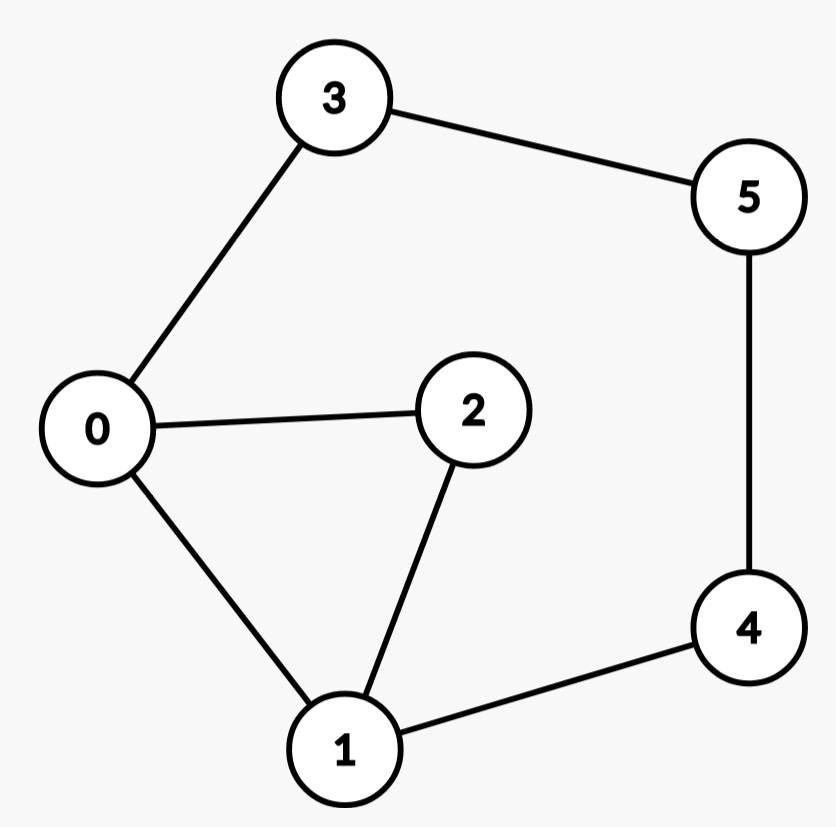


The algorithms uses a _queue_ (_deque_) to keep track of the order in which the vertexes must be traversed and a _set_ that saves the vertexes that have already been visited (where popped from the queue or are already in the queue). The time complexity is _O(V + E)_.


In [4]:
from collections import deque


def bfs(starting_vertex, graph):
    q = deque([starting_vertex])
    visited = set([starting_vertex])
    distance = 0

    while q:
        print(f"At distance {distance}:")

        for _ in range(len(q)):
            current = q.popleft()
            print(current)

            for neighbor in graph[current]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    q.append(neighbor)

        distance += 1


starting_vertex = 0

bfs(starting_vertex, graph_bfs)

At distance 0:
0
At distance 1:
1
2
3
At distance 2:
4
5


BFS finds the shortest distance from a starting vertex to all others in an unweighted graph - when each edge has the same weight\ length.


In [5]:
from collections import deque


def bfs(starting_vertex, graph):
    q = deque([starting_vertex])
    visited = set([starting_vertex])

    distances = {v: -1 for v in graph.keys()}
    distance = 0

    while q:
        for _ in range(len(q)):
            current = q.popleft()
            distances[current] = distance

            for neighbor in graph[current]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    q.append(neighbor)

        distance += 1

    return distances


starting_vertex = 0
distances = bfs(starting_vertex, graph_bfs)
print(distances)

{0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 2}


## Depth-first search


The algorithm traverses the graph starting from a given vertex. It progresses as deeply as possible along each branch before backtracking.


In [6]:
graph_dfs = {
    0: set([1, 2, 3]),
    1: set([0, 2, 4]),
    2: set([0, 1]),
    3: set([0, 5]),
    4: set([1, 5]),
    5: set([3, 4, 6]),
    6: set([5]),
}

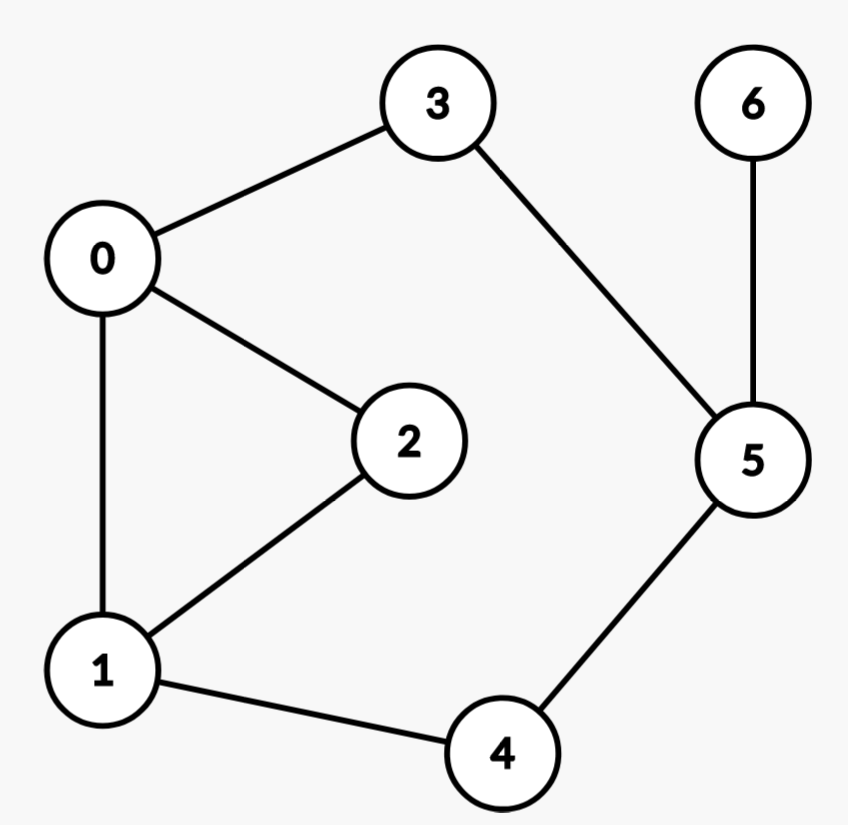


The algorithm keeps the order in which the vertexes must be traversed using _stack_ (or implicitly through _recursion_). Again, a _set_ is used to mark if a node is visited (was in the _stack_ or is currently in the _stack_).


In [7]:
def dfs(current, visited, graph):
    print(current)

    for neighbor in graph[current]:
        if neighbor not in visited:
            visited.add(neighbor)
            dfs(neighbor, visited, graph)


starting_vertex = 0
visited = set([starting_vertex])
dfs(starting_vertex, visited, graph_dfs)

0
1
2
4
5
3
6


Using stack for DFS explicitly:


In [8]:
def dfs_stack(starting_vertex, graph):
    stack = [starting_vertex]
    visited = set([starting_vertex])

    while stack:
        print(stack, stack[-1])
        current = stack.pop()

        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append(neighbor)


starting_vertex = 0
dfs_stack(starting_vertex, graph_dfs)

[0] 0
[1, 2, 3] 3
[1, 2, 5] 5
[1, 2, 4, 6] 6
[1, 2, 4] 4
[1, 2] 2
[1] 1


### Connected subgraphs


DFS and BFS can be used to count the number of connected subgraphs in disconnected graph.


In [9]:
graph_disconnected = {
    0: set([1, 2]),
    1: set([0, 2]),
    2: set([3]),
    3: set([2]),
    4: set([5, 6]),
    5: set([4, 6]),
    6: set([4, 5]),
    7: set(),
}

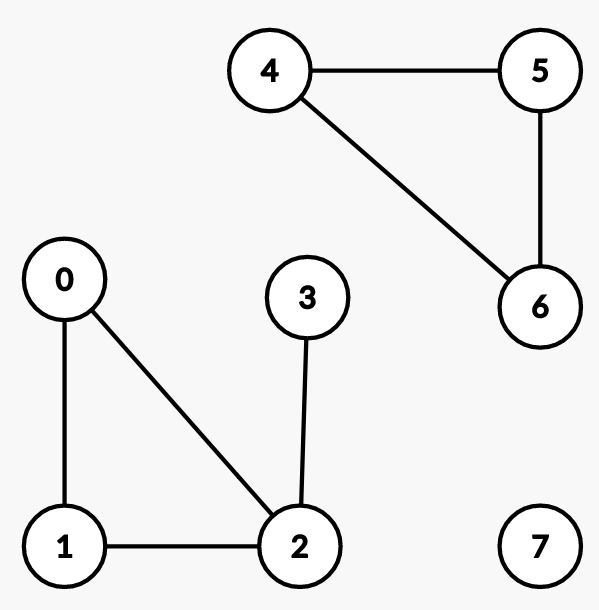


Each time a DFS/ BFS ends, all the visited vertexes belong to one subgraph. If we repeat the process for all vertexes that are left unvisited, we can find the number of subgraphs (connected components).


In [10]:
def dfs(current, visited, graph):
    for neighbor in graph[current]:
        if neighbor not in visited:
            visited.add(neighbor)
            dfs(neighbor, visited, graph)


def count_areas(graph):
    count = 0
    visited = set()

    for vertex in graph:
        if vertex in visited:
            continue
        visited.add(vertex)

        dfs(vertex, visited, graph)
        count += 1

    return count


count_areas(graph_disconnected)

3

### Finding a cycle


DFS is useful for finding a cycle within a directed graph.


The following graph has a cycle:


In [11]:
graph_with_cycle = {
    1: set([2]),
    2: set([3, 5]),
    3: set([4]),
    4: set([1]),
}

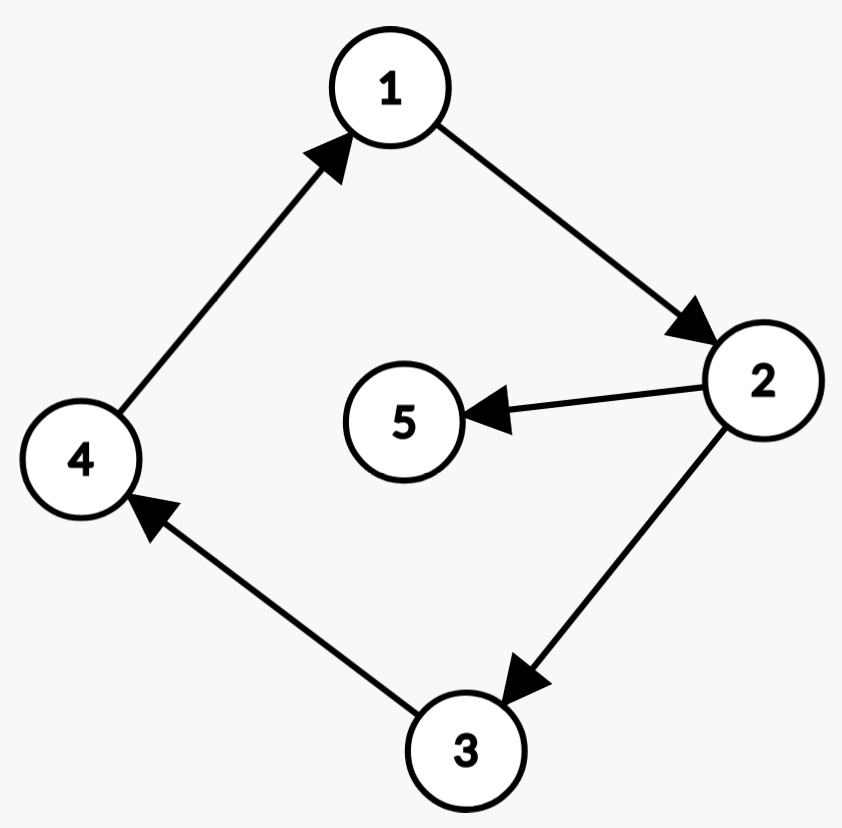


The following graph has no cycle:


In [12]:
graph_no_cycle = {
    1: set([2, 3]),
    2: set([4]),
    3: set([2, 4]),
    4: set([]),
}

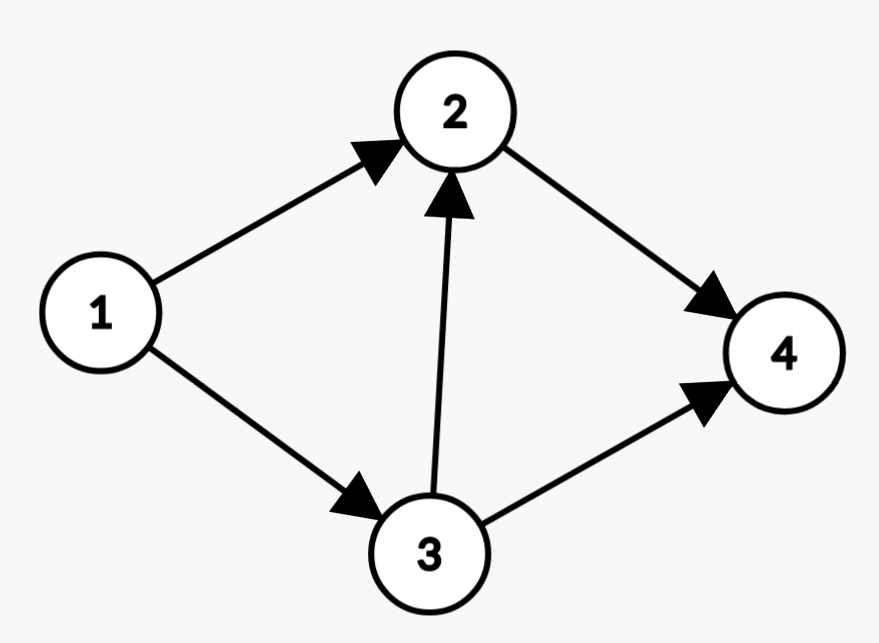


Main idea is to add another _set_ that saves the vertexes which are currently in the recursion stack. When a vertex exits the recursion it is removed from the recursion set.
If the algorithm adds a vertex that is already in the recursion set, there is a cycle. If the vertex is not in the recursion set, it is marked as visited. Visited vertexes do not show cycles.


In [13]:
def dfs_has_cycle(current, in_progress, visited, graph):
    in_progress.add(current)

    for neighbor in graph[current]:
        if neighbor in in_progress:
            return True

        if neighbor not in visited:
            visited.add(neighbor)
            if dfs_has_cycle(neighbor, in_progress, visited, graph):
                return True

    in_progress.remove(current)
    return False


def check_has_cycle(graph):
    visited = set()

    for vertex in graph:
        if vertex in visited:
            continue

        visited.add(vertex)
        in_progress = set()

        if dfs_has_cycle(vertex, in_progress, visited, graph):
            return True

    return False


print(check_has_cycle(graph_with_cycle))
print(check_has_cycle(graph_no_cycle))

True
False


This solution uses a coloring method with three states: 0, 1, and 2. Each node starts as unvisited with state 0. When a node is first visited and added to the current DFS stack, it is marked with state 1, indicating it is in progress. Once the DFS finishes exploring all descendants of a node and it exits the stack, the node is marked with state 2, meaning it has been fully checked. If during the traversal we encounter a node that is already in state 1, it indicates a cycle, because the node is currently in the recursion stack. Nodes that are already in state 2 are skipped, as they have been fully processed. In summary, the states are: 0 for not visited, 1 for in progress, and 2 for already checked.


In [14]:
def dfs_has_cycle_coloring(node, graph, state):
    if state[node] == 1:
        return True
    if state[node] == 2:
        return False

    state[node] = 1

    for neighbor in graph[node]:
        if dfs_has_cycle_coloring(neighbor, graph, state):
            return True

    state[node] = 2
    return False


def check_has_cycle_coloring(graph):
    state = {node: 0 for node in graph}

    for node in graph:
        if state[node] == 0:
            if dfs_has_cycle_coloring(node, graph, state):
                return True

    return False


print(check_has_cycle_coloring(graph_with_cycle))
print(check_has_cycle_coloring(graph_no_cycle))

True
False


### Topological sorting


Works only for **_DAG_** (_Directed Acyclic Graph_). Sorts the graph in such order that every vertex is before all his children. There may be more than one correct arrangement.


![Example of Topological Sorting of a graph](https://assets.leetcode.com/users/images/63bd7ad6-403c-42f1-b8bb-2ea41e42af9a_1613794080.8115625.png)


Another solution is [1, 4, 5, 6, 2, 3].


In [15]:
graph_topological = {1: set([2, 4]), 2: set([3]), 3: set(), 4: set([2, 5, 6]), 5: set([6]), 6: set()}

#### Topological sorting using DFS:


The main idea is to add the vertexes to a stack when they exit the DFS recursion. This way the root is going to be added last. If the recursion starts from a vertex that is not the root, the DFS must be called more than one time. Since the root is always going to be at the top of the stack, the sorted graph is stack in reversed order.


In [16]:
def topological_dfs(current, stack, visited, graph):
    visited.add(current)

    for neighbor in graph[current]:
        if neighbor not in visited:
            visited.add(neighbor)
            topological_dfs(neighbor, stack, visited, graph)

    stack.append(current)


def topological_sort(graph):
    stack = []
    visited = set()

    for vertex in graph:
        if vertex in visited:
            continue
        topological_dfs(vertex, stack, visited, graph)

    stack.reverse()
    return stack


topological_sort(graph_topological)

[1, 4, 5, 6, 2, 3]

#### Topological sorting using BFS:


Main idea is to find the _indegree_ of every vertex (how many edges end in the given vertex). The vertexes with _indegree = 0_ are the roots of the graph. Then we iterate starting from a root and remove each edge between the root and other unvisited vertexes - decreasing the _indegree_. When the _indegree_ of an unvisited vertex equals 0, it is added in the queue (it has become a root) and is marked as visited.


In [17]:
from collections import deque


def topological_bfs(graph):
    in_degree = {v: 0 for v in graph.keys()}

    for vertex in graph:
        for child in graph[vertex]:
            in_degree[child] += 1

    order = [v for v in graph.keys() if in_degree[v] == 0]

    q = deque(order)
    visited = set(order)

    while q:
        current = q.popleft()

        for neighbor in graph[current]:
            if neighbor not in visited:
                in_degree[neighbor] -= 1

            if in_degree[neighbor] == 0:
                visited.add(neighbor)
                q.append(neighbor)
                order.append(neighbor)

    return order


topological_bfs(graph_topological)

[1, 4, 2, 5, 3, 6]